# Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x=data.iloc[:,2:4].values
y=data.iloc[:,4].values

# Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

# Build Model

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [6]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
y_pred_train=dt_model.predict(x_train)
y_pred=dt_model.predict(x_test)

In [8]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [9]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

# Evaluate Model Peformance

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(0.85, 0.99375)

In [11]:
confusion_matrix(y_test,y_pred)

array([[44,  8],
       [ 4, 24]], dtype=int64)

In [12]:
confusion_matrix(y_train,y_pred_train)

array([[205,   0],
       [  2, 113]], dtype=int64)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        52
           1       0.75      0.86      0.80        28

    accuracy                           0.85        80
   macro avg       0.83      0.85      0.84        80
weighted avg       0.86      0.85      0.85        80



# Plot Decision Tree

In [14]:
from sklearn.tree import plot_tree

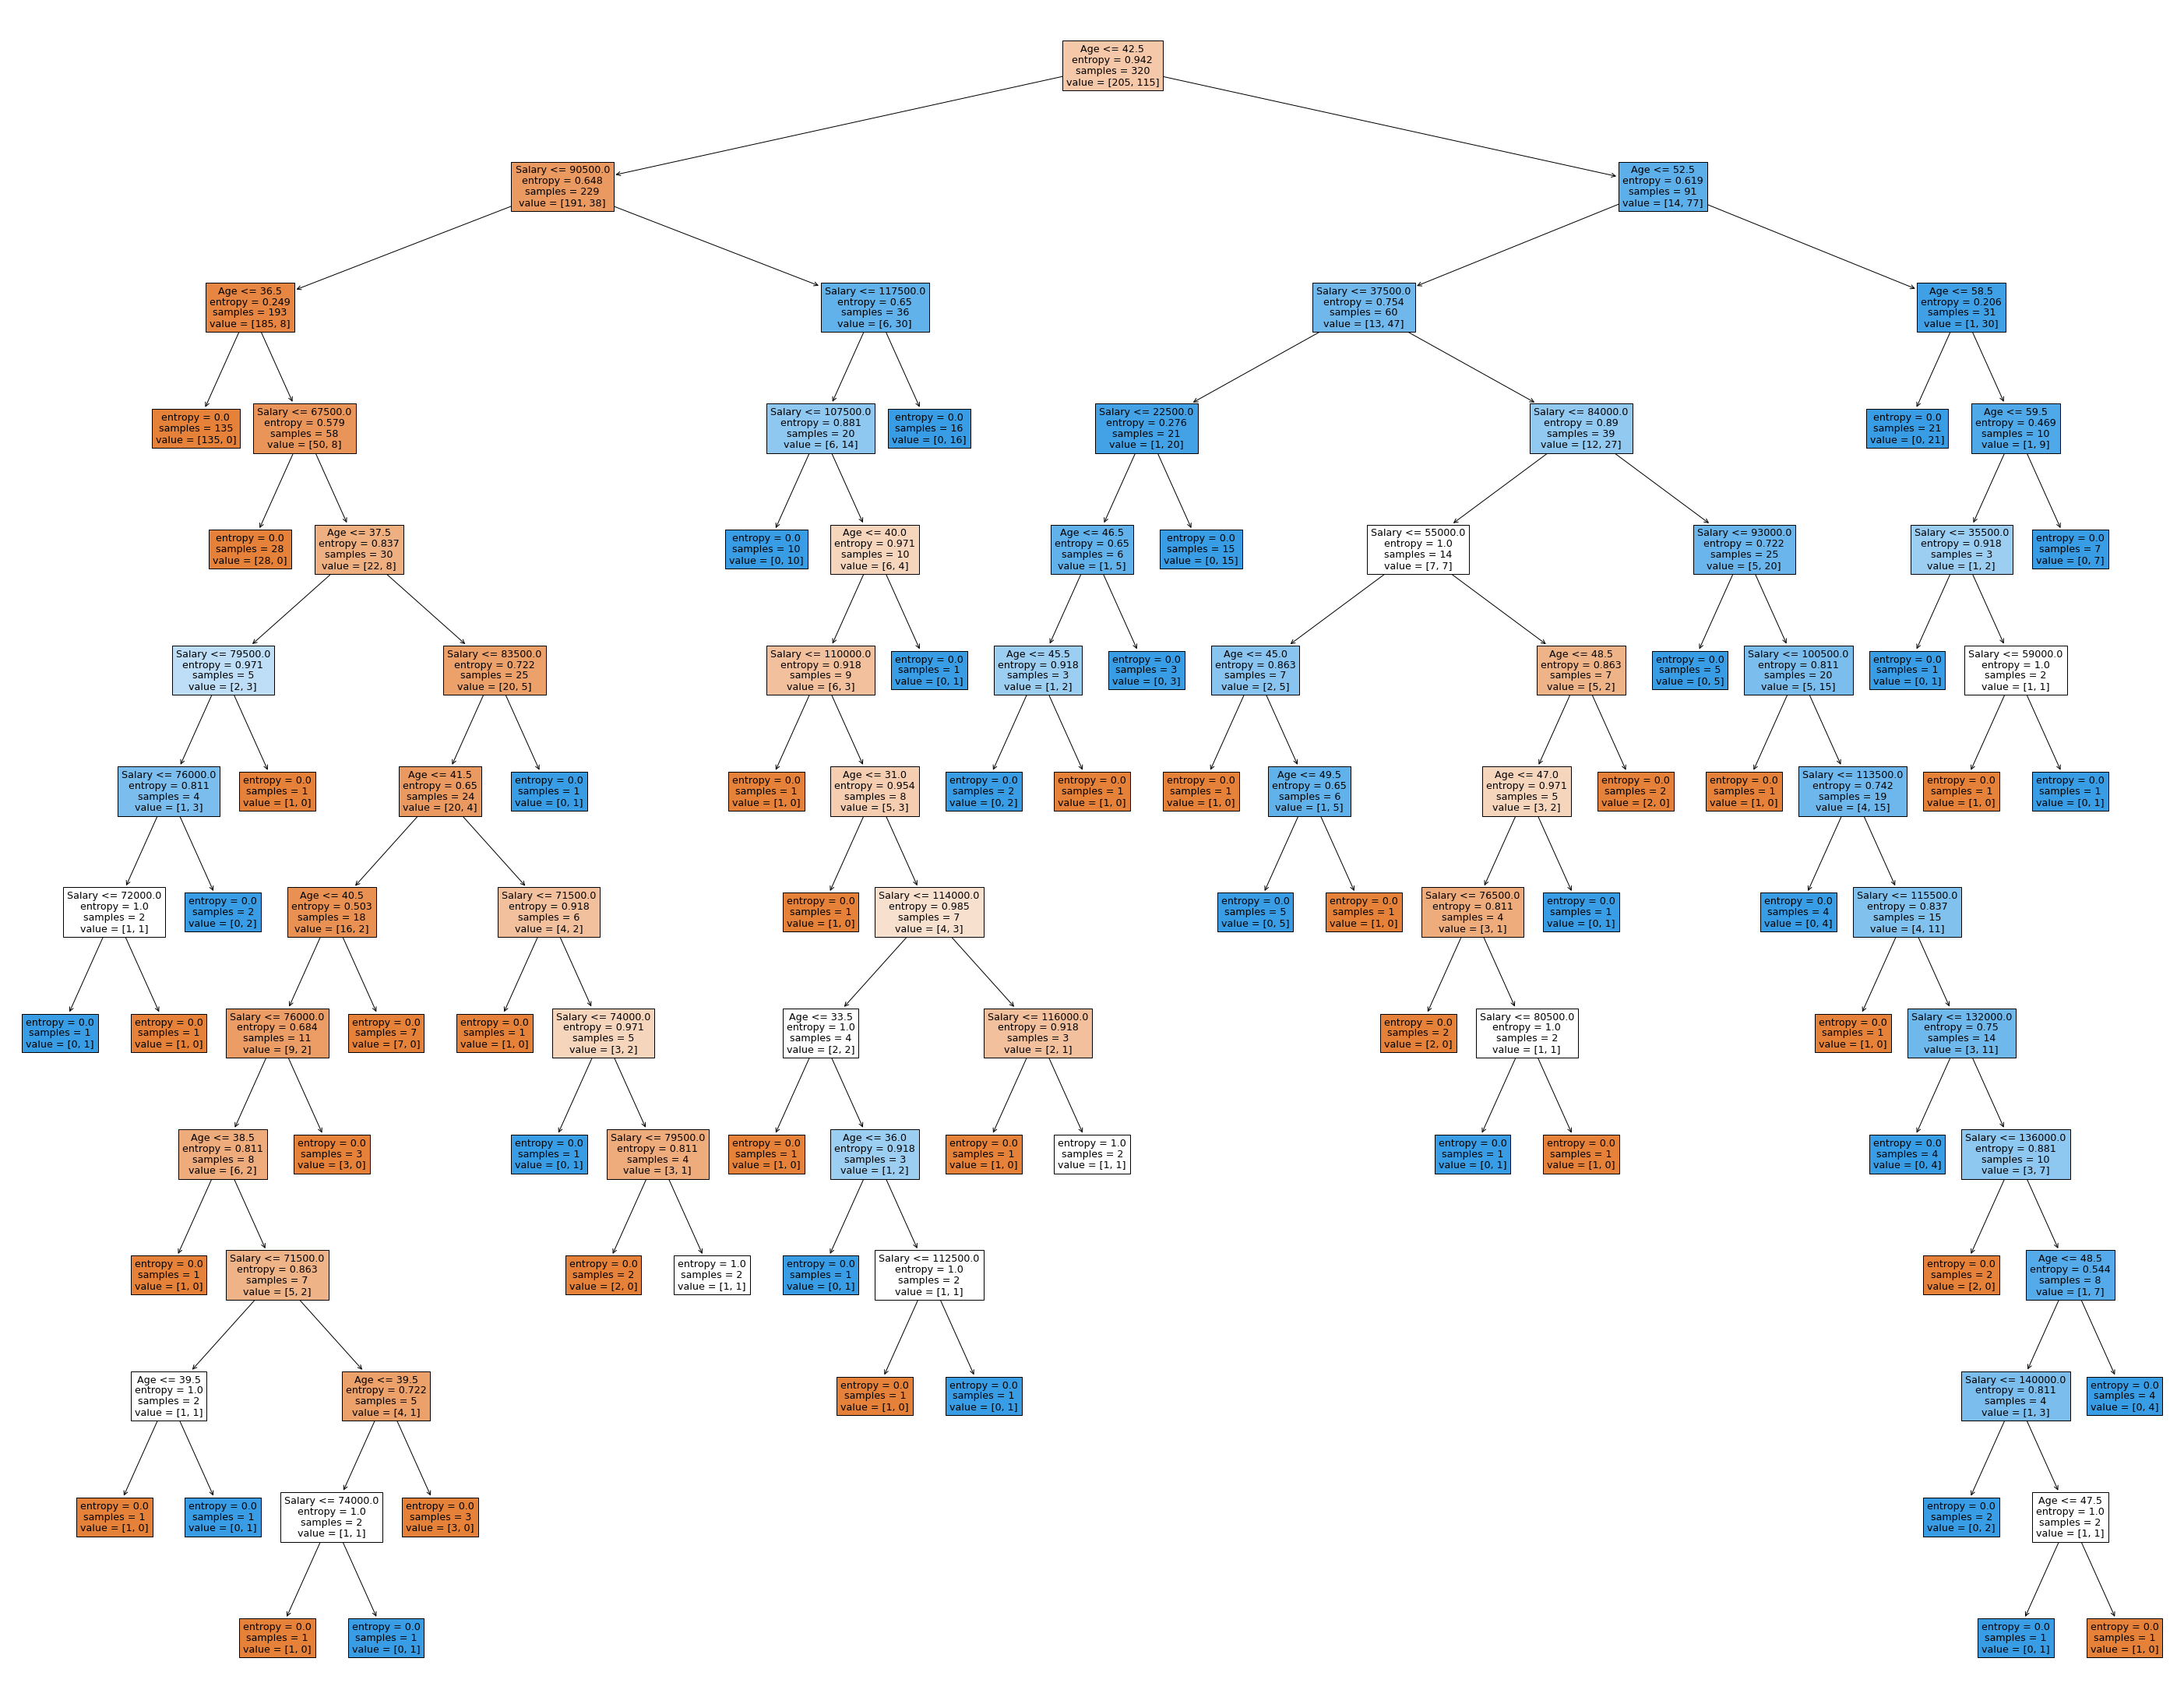

In [15]:
plt.figure(figsize=(50,40))
plot_tree(dt_model,filled=True,feature_names=['Age','Salary'])
plt.show()

# Plot Decision Region

In [16]:
from mlxtend.plotting import plot_decision_regions

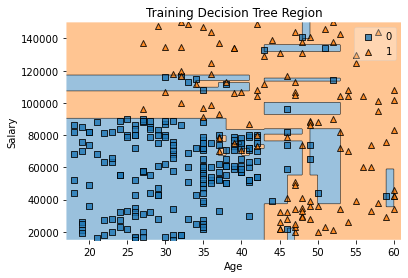

In [17]:
plot_decision_regions(x_train,y_train,clf=dt_model)
plt.title("Training Decision Tree Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

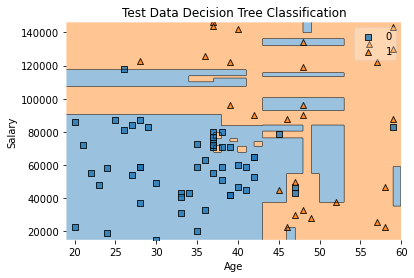

In [18]:
plot_decision_regions(x_test,y_test,clf=dt_model)
plt.title("Test Data Decision Tree Classification")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

# K-Fold Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
dt=DecisionTreeClassifier(criterion="entropy")
cv=cross_val_score(dt,x,y,scoring="accuracy",cv=4,n_jobs=2,verbose=1)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    4.3s finished


In [21]:
cv

array([0.8 , 0.92, 0.82, 0.79])

In [22]:
np.mean(cv)

0.8325

# Grid Search CV

In [23]:
dt=DecisionTreeClassifier()

In [26]:
max_features=['auto','sqrt','log2']
max_depth=np.linspace(5,35,5,dtype="int")
min_samples_split=[2,5,10,15,20,30,40,50,70,90,100]
min_samples_leaf=[1,2,4,6,10]
criterion=['gini','entropy']

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters={"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf,"criterion":criterion}
parameters

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': array([ 5, 12, 20, 27, 35]),
 'min_samples_split': [2, 5, 10, 15, 20, 30, 40, 50, 70, 90, 100],
 'min_samples_leaf': [1, 2, 4, 6, 10],
 'criterion': ['gini', 'entropy']}

In [39]:
gsv=GridSearchCV(dt,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=-1,verbose=5)

In [40]:
gsv.fit(x,y)

Fitting 10 folds for each of 1650 candidates, totalling 16500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1016 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 8824 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 16500 out of 16500 | elapsed:   19.4s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5, 12, 20, 27, 35]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 10],
                         'min_samples_split': [2, 5, 10, 15, 20, 30, 40, 50, 70,
                                               90, 100]},
             scoring='accuracy', verbose=5)

In [41]:
gsv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 30}

In [42]:
gsv.best_score_

0.9175000000000001

In [43]:
gsv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_leaf=4, min_samples_split=30)